# Bibliotecas

In [1]:
import math    
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Funções

In [2]:
def gradient(f, x, y, h = 1e-6):                    # função gradiente
    gradf = np.zeros((2,1))
    gradf[0] = np.imag(f(complex(x,h),y))/h
    gradf[1] = np.imag(f(x,complex(y,h)))/h
    return gradf

def golden_method(f, delta, x0, y0, epsilon):                    # Golden section method
    
    gsm = (math.sqrt(5) + 1)/2                          
    
    # Phase 01
    
    total = 0
    counter = 0
    f_0 = f(x0,y0)
    cond = True
    gradf = -gradient(f, x0, y0)
    alfa_m = np.zeros(3)
    alfa = 0
    
    while cond:
        total = total + 1
        
        alfa = alfa + delta*gsm**counter
        x = x0 + alfa*gradf[0][0]
        y = y0 + alfa*gradf[1][0]
        f_1 = f(x,y)
        
        if f_1 < f_0:
            f_0 = f_1
            counter = counter + 1
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
        else:
            counter = 0    
            cond = False
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa  
            
     # Phase 02
    
    alfa_range = np.array([alfa_m[0], alfa_m[2]])
    cond = True
    
    while cond:
        total = total + 1
        counter = counter + 1
        
        I = alfa_range[1] - alfa_range[0]
        
        alfa_a = alfa_range[0] + (1 - 1/gsm)*I
        
        x_a = x0 + alfa_a*gradf[0][0]
        y_a = y0 + alfa_a*gradf[1][0]
        
        f_a = f(x_a,y_a)
        
        alfa_b = alfa_range[0] + 1/gsm*I
        
        x_b = x0 + alfa_b*gradf[0][0]
        y_b = y0 + alfa_b*gradf[1][0]
        
        f_b = f(x_b,y_b)
    
        
        if f_a > f_b and I > epsilon:
            alfa_range[0] = alfa_a
            
        elif f_a < f_b and I > epsilon:
            alfa_range[1] = alfa_b
            
        elif I < epsilon:
            cond = False
            alfa = (alfa_a + alfa_b)/2
            x = x0 + alfa*gradf[0][0]
            y = y0 + alfa*gradf[1][0]
            f_1 = f(x,y)
    
    return alfa

Iteraction     0: f(x) =  41.5096, x1 =    -4.00, x2 =     4.00.
Iteraction     1: f(x) =  39.2671, x1 =    -4.04, x2 =     3.89.
Iteraction     2: f(x) =  37.1311, x1 =    -4.08, x2 =     3.77.
Iteraction     3: f(x) =  35.1070, x1 =    -4.11, x2 =     3.65.
Iteraction     4: f(x) =  33.1849, x1 =    -4.15, x2 =     3.53.
Iteraction     5: f(x) =  31.3668, x1 =    -4.18, x2 =     3.41.
Iteraction     6: f(x) =  29.6547, x1 =    -4.21, x2 =     3.29.
Iteraction     7: f(x) =  28.0469, x1 =    -4.23, x2 =     3.17.
Iteraction     8: f(x) =  26.5358, x1 =    -4.26, x2 =     3.04.
Iteraction     9: f(x) =  25.1225, x1 =    -4.27, x2 =     2.91.
Iteraction    10: f(x) =  23.8029, x1 =    -4.29, x2 =     2.77.
Iteraction    11: f(x) =  22.5701, x1 =    -4.29, x2 =     2.63.
Iteraction    12: f(x) =  21.4125, x1 =    -4.29, x2 =     2.49.
Iteraction    13: f(x) =  20.3184, x1 =    -4.28, x2 =     2.33.
Iteraction    14: f(x) =  19.2565, x1 =    -4.25, x2 =     2.16.
Iteraction    15: f(x) = 

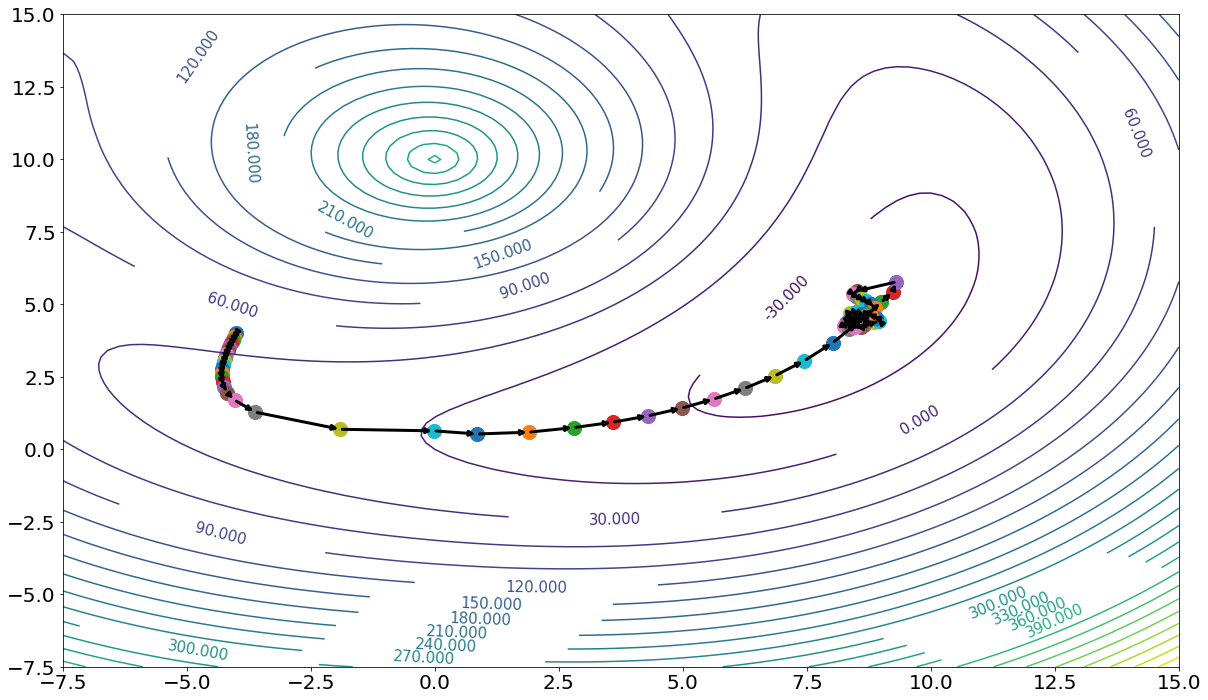

In [3]:
def f(x,y):                                         # função objetivo 
    f = 4*(np.sqrt(x**2+(10-y)**2)-10)**2 + (np.sqrt(x**2+(10+y)**2)-10)**2/2 - 5*(x+y)
    return f

I_min = 1e-3
epsilon = 1e-1
delta = 1e-4

size = 200

counter = 0
cond = True

x0 = -4
y0 =  4

if LA.norm(gradient(f, x0, y0)) < epsilon:
    cond = False

d_0 = -gradient(f, x0, y0)/LA.norm(gradient(f, x0, y0)) 
gradf_0 = gradient(f, x0, y0)

fig, ax = plt.subplots()

x = np.linspace(-7.5, 15, 100)
y = np.linspace(-7.5, 15, 100)
X, Y = np.meshgrid(x, y)

F = 4*(np.sqrt(X**2+(10-Y)**2)-10)**2 + (np.sqrt(X**2+(10+Y)**2)-10)**2/2 - 5*(X+Y)

contours = plt.contour(X, Y, F, 25)                            # plot função objetivo
plt.scatter(x0,y0,size)
plt.clabel(contours, inline=True, fontsize=15)
fig.set_size_inches(20, 12)

    
while cond:
    print("Iteraction {0:5d}: f(x) = {1:8.4f}, x1 = {2:8.2f}, x2 = {3:8.2f}.".format(counter, f(x0,y0), x0, y0))

    alfa = golden_method(f, delta, x0, y0, I_min)

    x1 = x0 + alfa*d_0[0][0]
    y1 = y0 + alfa*d_0[1][0]
    
    plt.scatter(x1,y1,size)
    ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x0, y0), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3",lw=3),
            )

    gradf_1 = gradient(f, x1, y1)                        # compute gradient at a given point
    if LA.norm(gradf_1) < epsilon:                      # verification of the gradient norm
        break

    beta = (LA.norm(gradf_1)/LA.norm(gradf_0))**2

    d_1 =  -gradf_1 + beta*d_0                          # search direction
    d_1 = d_1/LA.norm(d_1)

    gradf_0 = gradf_1
    d_0 = d_1
    counter = counter + 1
    
    x0 = x1
    y0 = y1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.savefig('mp_288_2.png',dpi=300)                              # salvar figura como png (dpi = número de pixels)